<a href="https://colab.research.google.com/github/SaurabhChakravorty/SHALA2020/blob/master/Saurabh_Assignment_ML_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Load the file as a dataframe 
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
titanic_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/titanic.csv")
df = titanic_data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_data.shape

(891, 12)

In [0]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Let's clean the dataset

In [0]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

Let's check the distribution of this column to replace with na values

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

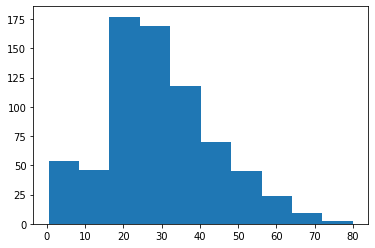

In [0]:
plt.hist(df.Age)

In [0]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(df.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


# 'Applying ML models' one by one

In [0]:
def create_one_hot(df, column_name):
    """One-hot encode column values. Takes the df and column name as
    input and return the df with one-hot encoded columns as output.
    """
    df[column_name] = pd.Categorical(df[column_name])
    one_hot = pd.get_dummies(df[column_name], prefix = column_name, drop_first=True)
    # add dummies to original df:
    df = df.drop(column_name,axis=1)
    df = pd.concat([one_hot, df], axis = 1)
    return df

df = create_one_hot(df, 'Embarked')
df = create_one_hot(df, 'Sex')

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, confusion_matrix, recall_score, accuracy_score,roc_auc_score,confusion_matrix

class classification:
  
  def __init__(self, X, y):
    
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    self.labels = np.unique(y).tolist()

  def confusion_matrix(self):

    cm = confusion_matrix(self.y_test, self.pred, self.labels)
    print(" The confusion matrix is :", '\n' , cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + self.labels)
    ax.set_yticklabels([''] + self.labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


  def calc_metrics_class(self):

    precision = precision_score(self.pred, self.y_test)
    recall = recall_score(self.pred,self.y_test)
    f1 = f1_score(self.pred,self.y_test)
    accuracy = accuracy_score(self.pred,self.y_test)
    roc = roc_auc_score(self.y_test, self.pred)
    print("The precision for the model is :", precision, '\n', "The recall for the model is : ", recall, '\n', "The f1 score of the model is :", f1, '\n', 
          "The accuracy of the model is : ", accuracy, '\n', "The ROC curve of the model is : ", roc )

  def gradient_boost(self):
      print("Performing modelling for Gradient boost")
      GradBoostClasCV = GradientBoostingClassifier(random_state=42)
      model_params = {
                        "max_depth": [20],
                        "subsample": [ 0.5],
                        "n_estimators":[150],
                        "learning_rate": [0.01],
                        "criterion": ['mae']
                      }
      grid_model = GridSearchCV(estimator=GradBoostClasCV, param_grid=model_params, cv=5, n_jobs=-1)
      grid_model.fit(self.X_train,self.y_train)
      print("Best parameters =", grid_model.best_params_)
      model_clf = GradBoostClasCV.set_params(**grid_model.best_params_)
      model_clf.fit(self.X_train, self.y_train)
      self.pred = model_clf.predict(self.X_test)
      self.calc_metrics_class()
      self.confusion_matrix()

  def random_forest(self):
      print("Performing modelling for Random forest")
      rf_model = RandomForestClassifier(random_state=1)
      param_grid = {
                    'n_estimators': [150],
                    'max_features': ['auto'],
                    'min_samples_split': [2]
                    }
      grid_model = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv = 3, verbose=2, n_jobs=-1)
      grid_model.fit(self.X_train,self.y_train)
      print("Best parameters =", grid_model.best_params_)
      model_clf = rf_model.set_params(**grid_model.best_params_)
      model_clf.fit(self.X_train, self.y_train)
      self.pred = model_clf.predict(self.X_test)
      self.calc_metrics_class()
      self.confusion_matrix()

  def decision_tree(self):
      print("Performing modelling for decision tree")
      #create a dictionary of all values we want to test
      param_grid = { 'criterion':['gini'],'max_depth': [10]}
      # decision tree model
      dtree_model=DecisionTreeClassifier()
      #use gridsearch to test all values
      grid_model = GridSearchCV(dtree_model, param_grid, cv=5, n_jobs=-1)
      grid_model.fit(self.X_train,self.y_train)
      print("Best parameters =", grid_model.best_params_)
      model_clf = dtree_model.set_params(**grid_model.best_params_)
      model_clf.fit(self.X_train, self.y_train)
      self.pred = model_clf.predict(self.X_test)
      self.calc_metrics_class()
      self.confusion_matrix()

 Applied models and got accuracy one by one

Performing modelling for Random forest
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.7s finished


Best parameters = {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 150}
The precision for the model is : 0.7567567567567568 
 The recall for the model is :  0.8 
 The f1 score of the model is : 0.7777777777777778 
 The accuracy of the model is :  0.8212290502793296 
 The ROC curve of the model is :  0.8117117117117117
 The confusion matrix is : 
 [[91 14]
 [18 56]]


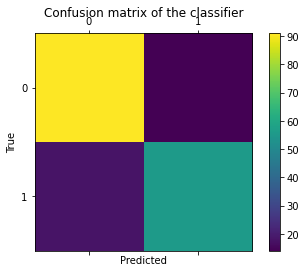

Performing modelling for Gradient boost
Best parameters = {'criterion': 'mae', 'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 150, 'subsample': 0.5}
The precision for the model is : 0.7162162162162162 
 The recall for the model is :  0.8153846153846154 
 The f1 score of the model is : 0.762589928057554 
 The accuracy of the model is :  0.8156424581005587 
 The ROC curve of the model is :  0.800965250965251
 The confusion matrix is : 
 [[93 12]
 [21 53]]


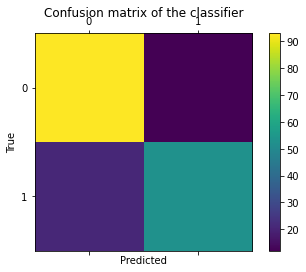

Performing modelling for decision tree
Best parameters = {'criterion': 'gini', 'max_depth': 10}
The precision for the model is : 0.6621621621621622 
 The recall for the model is :  0.7903225806451613 
 The f1 score of the model is : 0.7205882352941176 
 The accuracy of the model is :  0.7877094972067039 
 The ROC curve of the model is :  0.7691763191763192
 The confusion matrix is : 
 [[92 13]
 [25 49]]


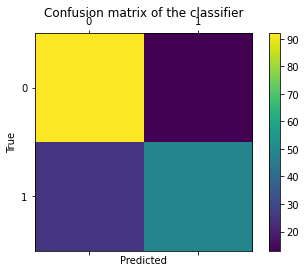

In [17]:
X = df.drop('Survived',axis=1)
y = df['Survived']
p1 = classification(X,y)
p1.random_forest()
p1.gradient_boost()
p1.decision_tree()